In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import pandas as pd
import numpy as np
import matplotlib as mpl

In [4]:
df = pd.read_csv('GA_data_v1234.csv')
df = df.sort_values(by=['PCE'], ascending=True)
df = df.reset_index(drop=True)
df

,Molecule,HOMO-1 (eV),HOMO (eV),LUMO (eV),LUMO+1 (eV),fund bg,Delta HOMO,delta LUMO,optical bandgap (cm-1),opt bg (nm),...,single point energy,dipole moment (debye),summed oscs,first oscs,highest oscs under ten,first Energy Transition eV,first Energy transition wavenumber,lowest Energy Transition eV,lowest Energy transition wavenumber,PCE
0,110_117_117_117_110_13331,-8.20,-8.00,-2.12,-1.94,5.88,0.20,0.18,31055.6,322.003117,...,-3830.341823,7.91700,0.297963,0.141200,0.155529,3.850273,31055.6,3.863378,31161.3,4.424491
1,89_162_89_162_89_02020,-6.69,-6.54,0.24,0.41,6.78,0.15,0.17,35730.9,279.869805,...,-3158.535083,3.60758,0.991696,0.255083,0.736613,4.429917,35730.9,4.967358,40065.8,5.167011
2,11_50_14_50_11,-6.99,-6.76,-2.76,-2.65,4.00,0.23,0.11,11963.5,835.875789,...,-3068.688616,2.74453,1.198517,0.067789,0.099580,1.483235,11963.5,2.116215,17069.0,5.792205
3,110_116_147_116_110_13531,-7.77,-7.67,-3.10,-2.84,4.57,0.10,0.26,17966.4,556.594532,...,-3317.985709,8.73755,2.423895,0.025611,0.224698,2.227474,17966.4,2.635802,21259.9,6.926400
4,161_109_5_161_913_13510,-7.28,-7.14,-1.96,-1.82,5.18,0.14,0.14,16886.2,592.199548,...,-4750.792631,3.66326,2.341073,0.001176,0.013267,2.093551,16886.2,2.906290,23441.6,6.982554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5486,90_485_103_485_90,-7.22,-6.00,-3.99,-3.44,2.01,1.22,0.55,3164.4,3160.156744,...,-3767.751428,10.42013,10.012731,0.019880,0.111176,0.392322,3164.4,0.758299,6116.3,22.141827
5487,55_644_103_644_55,-7.66,-6.06,-3.38,-3.15,2.68,1.60,0.23,8966.1,1115.312120,...,-4376.874756,3.44100,8.913414,0.125460,0.125460,1.111617,8966.1,1.111617,8966.1,22.244967
5488,45_45_44_45_45_10201,-7.13,-6.03,-3.41,-2.96,2.62,1.10,0.45,7180.2,1392.718866,...,-5974.824088,16.78404,10.466552,0.570813,0.717320,0.890201,7180.2,1.679681,13548.0,22.256138
5489,62_644_103_644_62,-7.89,-6.13,-3.63,-3.46,2.50,1.76,0.17,6560.7,1524.227598,...,-4168.385543,4.35093,8.514024,0.055258,0.055258,0.813396,6560.7,0.813396,6560.7,22.375808


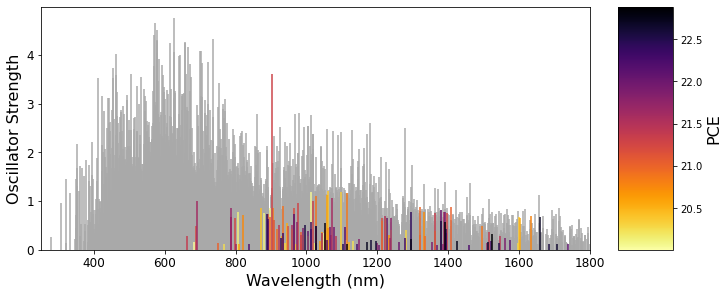

In [6]:
fig, (ax, ax2)  = plt.subplots(1, 2, figsize=(10, 4),constrained_layout=True, gridspec_kw={'width_ratios': [10, 1]})

df_above20 = df[df.PCE > 20]
viridis = cm.get_cmap('inferno_r',len(df_above20))
newcolors = viridis(np.linspace(0, 1, len(df_above20)))


top_PCE=[]
count = 0
for i in range(len(df)-len(df_above20)):
    ax.vlines(df['opt bg (nm)'][i], [0], df['oscillator strength'][i], colors = 'darkgrey')

for i in range(len(df)-len(df_above20), len(df)):

    top_PCE.append(df['PCE'][i])
    ax.vlines(df['opt bg (nm)'][i], [0], df['oscillator strength'][i], colors = newcolors[count])
    count +=1
    
    
min_PCE = min(top_PCE)
max_PCE = max(top_PCE)

cmap = mpl.cm.inferno_r
norm = mpl.colors.Normalize(vmin = min_PCE, vmax = max_PCE)

colbar = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, orientation='vertical')
colbar.set_label('PCE', fontsize=16)

ax.set_xlabel('Wavelength (nm)', fontsize=16)
ax.set_ylabel('Oscillator Strength', fontsize=16)
ax.set_ylim(bottom=0)
ax.set_xlim(left=250, right=1800)
ax.tick_params(axis='x', labelsize= 12)
ax.tick_params(axis='y', labelsize= 12)


plt.savefig('absorption_spectra_v1234.png')
plt.savefig('absorption_spectra_v1234.pdf', dpi=600)